In [113]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.coingecko.com/zh-tw/%E5%8C%AF%E7%8E%87%E8%B5%B0%E5%8B%A2%E5%9C%96/%E6%AF%94%E7%89%B9%E5%B9%A3/twd')
soup = BeautifulSoup(res.text, 'html.parser')

In [121]:
data_prices = soup.select('#coin_maxd_historical_price_chart')[0].prettify('utf-8').decode('utf-8')

In [123]:
import re
m = re.search('<div data-prices="(.*?)"', data_prices)

In [126]:
import json
jd = json.loads(m.group(1))
#jd

In [128]:
import pandas
df = pandas.DataFrame(jd)
#df

In [129]:
df.columns = ['datetime', 'twd']

In [132]:

df['datetime'] = pandas.to_datetime(df['datetime'], unit='ms')

In [133]:
df.head()

,datetime,twd
0,2013-04-28,NaN
1,2013-04-29,4262.3287
2,2013-04-30,4104.9241
3,2013-05-01,3433.0342
4,2013-05-02,3136.7031


In [134]:
df.index = df['datetime']

Populating the interactive namespace from numpy and matplotlib


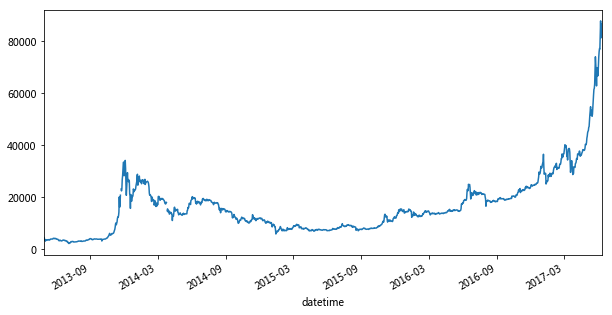

In [137]:
%pylab inline
df['twd'].plot(kind = 'line', figsize = [10,5])

In [139]:
df['ma7'] = df['twd'].rolling(window = 7).mean()

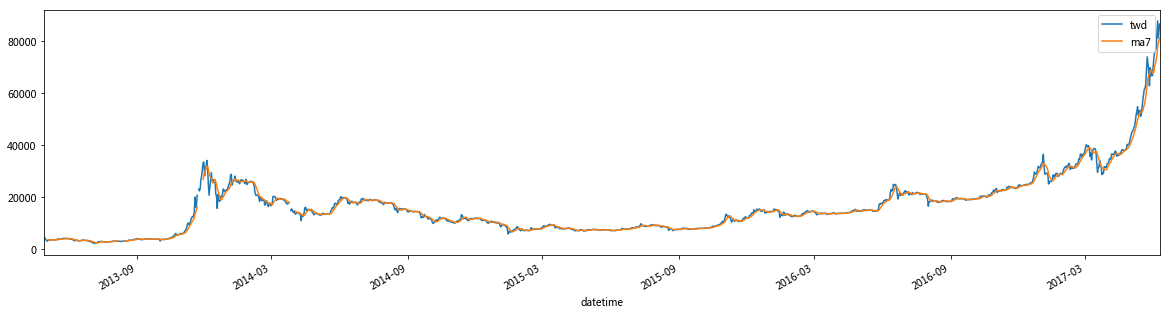

In [143]:
df[['twd', 'ma7']].plot(kind = 'line', figsize=[20,5])

In [144]:
df2 = df[df['datetime'] >= '2017-01-01']

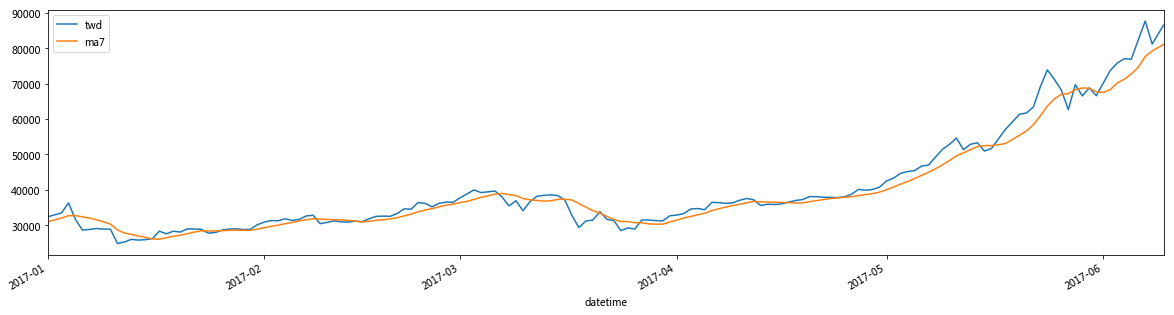

In [146]:
df2[['twd', 'ma7']].plot(kind = 'line', figsize=[20,5])